# Predicting House Prices: A Kaggle Competition

Hello, my name is Victor and this is my journey through the House Prices competition on Kaggle. The main aim of this project is to predict the sales price for each house in the test set provided by the competition.

The housing market is one of the most crucial parts of the economy for every country. Predicting house prices is a challenging task due to the variety of factors that can influence the price. These can range from the square footage to the location, to the number of bedrooms or even the year the house was built. Understanding these factors can lead to more accurate predictions and can potentially reveal interesting insights about the housing market.

In this project, I will start by exploring the dataset provided by the competition, followed by data cleaning and preprocessing. Afterward, I will build a machine learning model to predict the house prices.

I hope that you will find it interesting and informative.

Let's dive into the data!

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Setting the aesthetics for the plots
sns.set_style("whitegrid")

# Loading the data - change the file location to yours
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

# Let's take a quick look at the data
print("Training data:")
print(train_data.head())
print("\nTest data:")
print(test_data.head())

Training data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   20

In [2]:
# Shape of the data
print(f"The train dataset has {train_data.shape[0]} rows and {train_data.shape[1]} columns.")
print(f"The test dataset has {test_data.shape[0]} rows and {test_data.shape[1]} columns.")

The train dataset has 1460 rows and 81 columns.
The test dataset has 1459 rows and 80 columns.


We begin by examining the size of the training and testing datasets. Knowing the number of observations and features helps us plan our further steps.

In [3]:
# Overview of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The `info()` function provides essential details about our dataset, such as the number of entries, the data type of each feature, and the number of non-null values. It helps us identify features with missing values and plan how we might handle them.

In [4]:
# Check for missing values
missing_values = train_data.isnull().sum().sort_values(ascending=False)
missing_percentage = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percentage'])
print("\nMissing data:")
print(missing_data[missing_data['Total']>0])


Missing data:
              Total  Percentage
PoolQC         1453    0.995205
MiscFeature    1406    0.963014
Alley          1369    0.937671
Fence          1179    0.807534
FireplaceQu     690    0.472603
LotFrontage     259    0.177397
GarageYrBlt      81    0.055479
GarageCond       81    0.055479
GarageType       81    0.055479
GarageFinish     81    0.055479
GarageQual       81    0.055479
BsmtFinType2     38    0.026027
BsmtExposure     38    0.026027
BsmtQual         37    0.025342
BsmtCond         37    0.025342
BsmtFinType1     37    0.025342
MasVnrArea        8    0.005479
MasVnrType        8    0.005479
Electrical        1    0.000685


Detecting missing values is crucial as they can impact the performance of a machine learning model. From the above output, we can see which features have missing values and what percentage of the total values are missing. This will guide our strategy for data cleaning and imputation.

In [5]:
# Descriptive statistics
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The `describe()` function gives us a statistical summary of the numerical columns in the dataset. This information can be helpful in identifying potential outliers. For example, if the maximum value for a feature is significantly higher than its 75th percentile value, we may suspect that it is an outlier (like LotFrontage, MasVnrArea and others in this case, these cases are kind of expected in this problem, as they are actually mansions and other big houses).

In [6]:
# Divide features into numerical and categorical features
numerical_features = train_data.select_dtypes(include=[np.number])
categorical_features = train_data.select_dtypes(include=[np.object])

print(f"Number of Numerical features: {len(numerical_features.columns)}")
print(f"Number of Categorical features: {len(categorical_features.columns)}")

Number of Numerical features: 38
Number of Categorical features: 43


/tmp/ipykernel_20/2305105604.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = train_data.select_dtypes(include=[np.object])


Our dataset contains both numerical and categorical features. It's essential to handle these types of features differently during data preprocessing and feature engineering steps.

In [7]:
# Statistics for numerical features
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We can see the summary statistics of all the numerical features here. The count, mean, standard deviation, minimum, maximum, and quartile values are listed for each numerical column. This data can give us an idea of the range and distribution of values in these columns.

In [8]:
# Checking for correlation between numerical features
correlation = numerical_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False)[:5], '\n')
print(correlation['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Checking for correlation between numerical features is a crucial step in understanding our dataset. The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it's close to -1, the variables have a strong negative correlation. In this case, Overral Quality has a great correlation, that makes sense, because this metric is like a qualitative general analysis about the house price, is also worth mentioning that there are other metrics with strong correlations, it makes our lives easier when trying to predict the price based on other metrics

In [9]:
# Explore categorical features
categorical_features.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


The summary of categorical features gives us a sense of how many unique categories are in each column, the most frequently occurring value, and the number of occurrences of the top value.

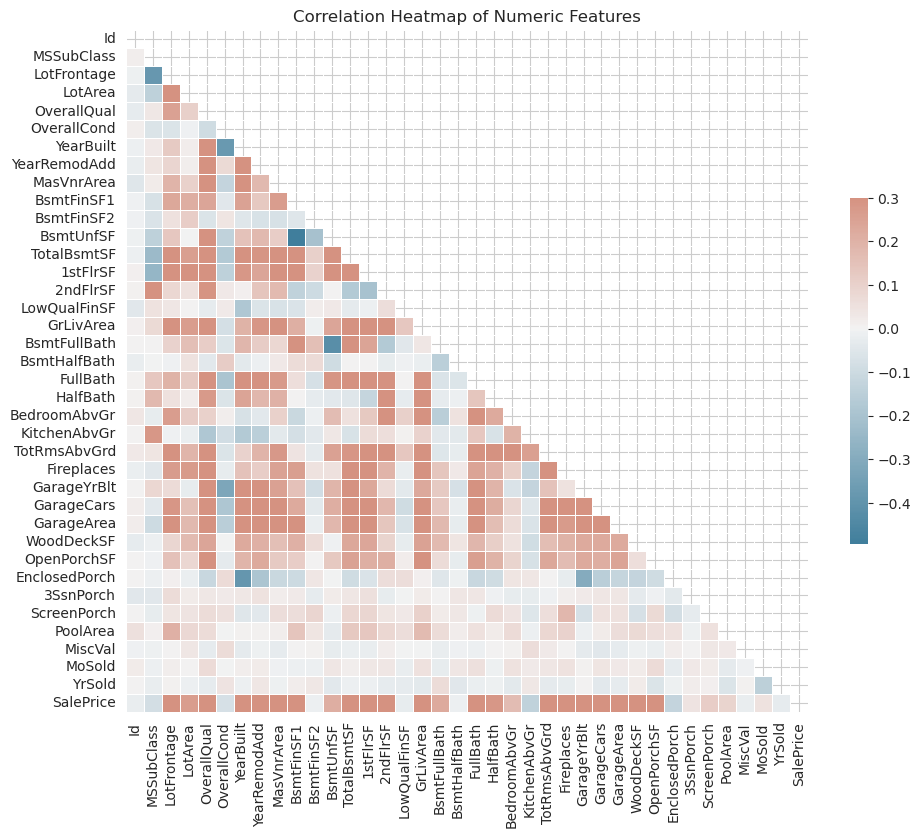

In [10]:
# Compute the correlation matrix
corr = numerical_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Numeric Features')
plt.show()

The heatmap above provides a clear visual representation of how the features in the dataset are correlated with each other. The darker the color, the stronger the correlation. The color represents the correlation coefficient, which ranges from -1 (a strong negative correlation) to 1 (a strong positive correlation). We can see that some features are strongly correlated with the target variable 'SalePrice'. We can also see strong correlations between some features, suggesting that there might be redundant information in our dataset. These observations will be useful for feature selection and feature engineering in the later steps.

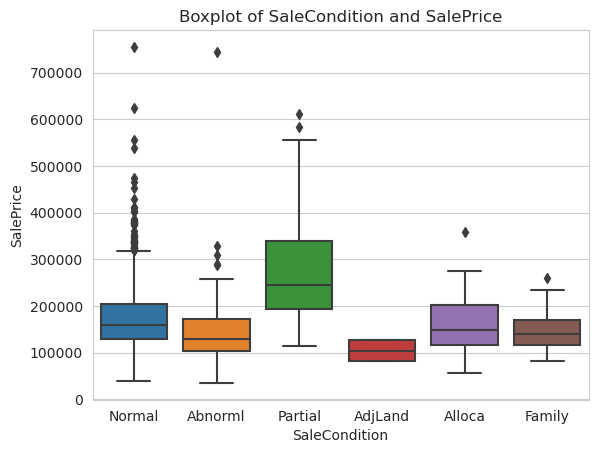

In [11]:
# Example of a boxplot for a categorical feature
sns.boxplot(x='SaleCondition', y='SalePrice', data=train_data)
plt.title('Boxplot of SaleCondition and SalePrice')
plt.show()

The boxplot above shows the distribution of 'SalePrice' across different categories of 'SaleCondition'. This kind of plot can help us understand how the target variable varies with categorical features. We can observe some variations in the median sale price for different sale conditions, which suggests that this feature may be important in predicting the house price. In this case, a partial sale condition seems to increase the house value in at least 100,000 USD

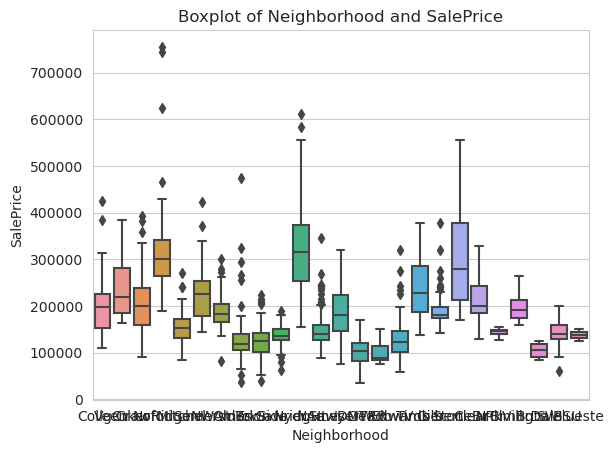

In [12]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.title('Boxplot of Neighborhood and SalePrice')
plt.show()

There is also extreme variations between different neighborhoods, as expected; we also can see that the outliers are in the most expensive neighborhoods

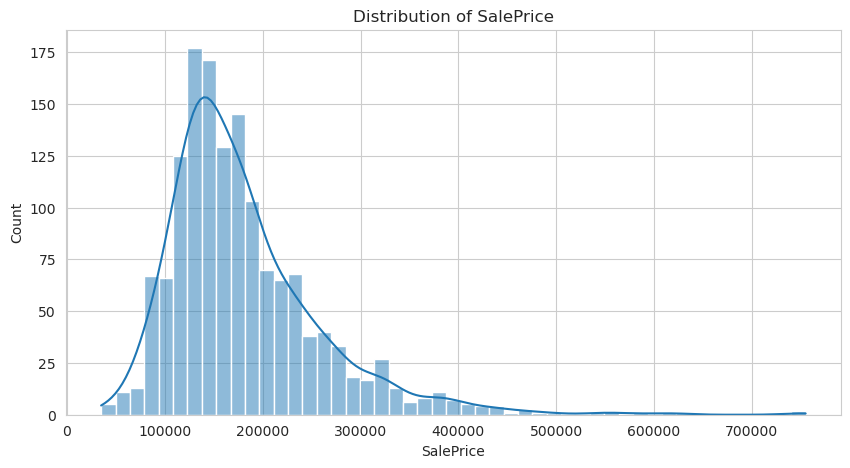

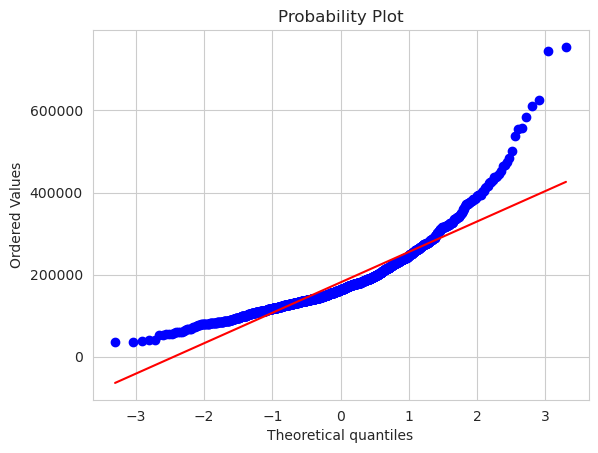

Shapiro test statistic: 0.869672954082489, p-value: 3.2072044604461286e-33


In [13]:
plt.figure(figsize=(10,5))

# Histogram and kde
sns.histplot(train_data['SalePrice'], kde=True)

plt.title('Distribution of SalePrice')
plt.show()

# Probability plot
stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(train_data['SalePrice'])
print(f"Shapiro test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

The SalePrice variable is our target variable for this analysis. We see from the histogram and kde plot that it is positively skewed. This means there are a minority of very high-priced homes in the dataset, which drag the mean upwards but most of the house prices are clustered in the lower range. This is also reflected in the probability plot, where we can see the points deviating from the red line, showing it doesn't fit well to a normal distribution. The Shapiro-Wilk test for normality confirms this observation, since the p-value is less than 0.05, we reject the null hypothesis of this test which states that the data is normally distributed. We will need to keep this in mind for any modelling as many models assume a normally distributed target variable.

This concludes the EDA, the analysis is being made in Classification Project (House Prices Competition 2 of 3)